**Machine Learning Project**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Here, we can see the information, so now we decided to use loan_status as the target variable, so we are changing the place to the last one for the convinience. 

In [4]:
column_to_move = "loan_status" 
column_data = df.pop(column_to_move)
df[column_to_move] = column_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.drop_duplicates()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


Here, we have dropped duplicates, now we can see that only 32416 data left from 32581 data.

In [6]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64


Now, we can see here some NaN format information inside the dataset, so let's fix it.

In [7]:
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_percent_income         28638 non-null  float64
 9   cb_person_default_on_file   28638 non-null  object 
 10  cb_person_cred_hist_length  28638 non-null  int64  
 11  loan_status                 28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [9]:
df_cleaned.reset_index(drop=True, inplace=True)

Here, we resetted the indexes of the data to have data consistency, readability, and proper alignment.

In [10]:
df_cleaned["loan_status"].value_counts().to_frame()

,count
loan_status,
0,22435
1,6203


Here, we can see that distribution of the target is not equal and the ratio is 22% to 78%

In [11]:
print(df_cleaned.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  28638.000000   2.863800e+04       28638.000000  28638.000000   
mean      27.727216   6.664937e+04           4.788672   9656.493121   
std        6.310441   6.235645e+04           4.154627   6329.683361   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.948000e+04           2.000000   5000.000000   
50%       26.000000   5.595600e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   28638.000000         28638.000000                28638.000000   
mean       11.039867             0.169488                    5.793736   
std         3.229372             0.106393                    4.038483   
min         5.420000             0.000000                    2.00000

In [12]:
def find_outliers_zscore_mask(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold

In [13]:
age_zscore = find_outliers_zscore_mask(df_cleaned['person_age'])
df_age_outliers_removed = df_cleaned[~age_zscore]

In [14]:
df_age_outliers_removed.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,28158.000000,2.815800e+04,28158.000000,28158.000000,28158.000000,28158.000000,28158.000000,28158.000000
mean,27.287769,6.608035e+04,4.767278,9647.440337,11.039331,0.169627,5.568755,0.216457
std,5.223482,4.885959e+04,4.093311,6326.732503,3.228213,0.106403,3.602188,0.411837
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.900000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.553000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000,0.000000
max,46.000000,2.039784e+06,123.000000,35000.000000,23.220000,0.830000,17.000000,1.000000


In [15]:
income_zscore = find_outliers_zscore_mask(df_age_outliers_removed['person_income'])
df_income_outliers_removed = df_age_outliers_removed[~income_zscore]

In [16]:
df_income_outliers_removed.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,27812.000000,27812.000000,27812.000000,27812.000000,27812.000000,27812.000000,27812.000000,27812.000000
mean,27.237487,62790.339386,4.739681,9544.132029,11.025634,0.170956,5.538904,0.217460
std,5.201905,33451.350571,4.071638,6211.087401,3.223496,0.106306,3.587756,0.412526
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.010000,2.000000,0.000000
25%,23.000000,39000.000000,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,78000.000000,7.000000,12000.000000,13.470000,0.230000,8.000000,0.000000
max,46.000000,210000.000000,123.000000,35000.000000,23.220000,0.830000,17.000000,1.000000


In [17]:
amount_zscore = find_outliers_zscore_mask(df_income_outliers_removed['loan_amnt'])
df_removed = df_income_outliers_removed[~amount_zscore]

In [18]:
df_removed.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000
mean,27.228361,62392.713016,4.724987,9337.275992,11.011027,0.169534,5.532649,0.215991
std,5.197997,33175.427402,4.006969,5833.689065,3.212245,0.105258,3.583009,0.411515
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.010000,2.000000,0.000000
25%,23.000000,39000.000000,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,78000.000000,7.000000,12000.000000,13.470000,0.230000,8.000000,0.000000
max,46.000000,210000.000000,123.000000,28000.000000,23.220000,0.830000,17.000000,1.000000


Here, we dropped outliers for age, person income and loan amount.

In [19]:
df_removed["loan_status"].value_counts().to_frame()

,count
loan_status,
0,21612
1,5954


Now, the relationship of the target variable after dropping outliers is 22% to 78%.

In [ ]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

categorical_columns_label = ['cb_person_default_on_file', 'person_home_ownership', 'loan_grade']

categorical_columns_onehot = ['loan_intent']

numerical_columns = df_removed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply Standard Scaling to numerical features
scaler = StandardScaler()
df_removed[numerical_columns] = scaler.fit_transform(df_removed[numerical_columns])

# Apply one-hot encoding for nominal features
df_encoded = pd.get_dummies(df_removed, columns=categorical_columns_onehot, drop_first=True)

# Apply label encoding to ordinal or binary features
label_encoder = LabelEncoder()
for col in categorical_columns_label:
    df_encoded[col] = label_encoder.fit_transform(df_removed[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_17208\3866697863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed[numerical_columns] = scaler.fit_transform(df_removed[numerical_columns])


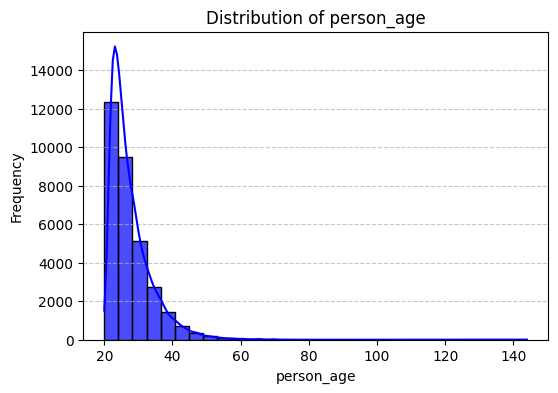

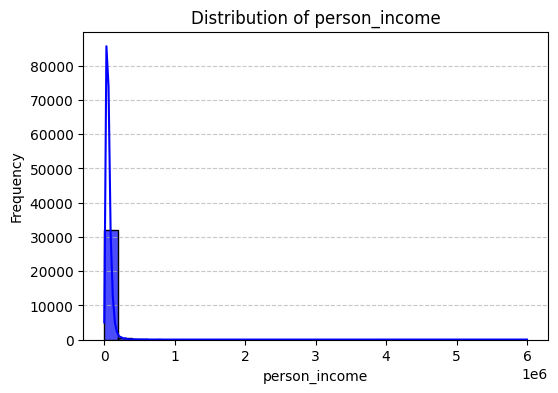

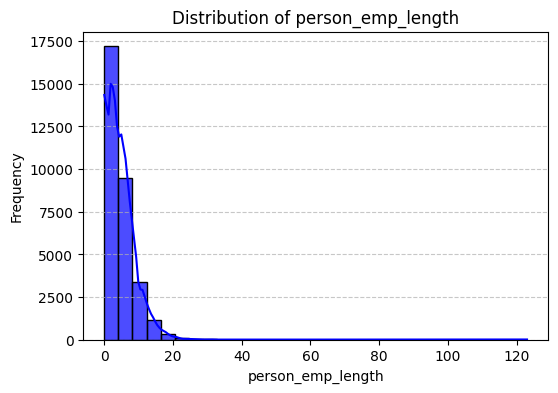

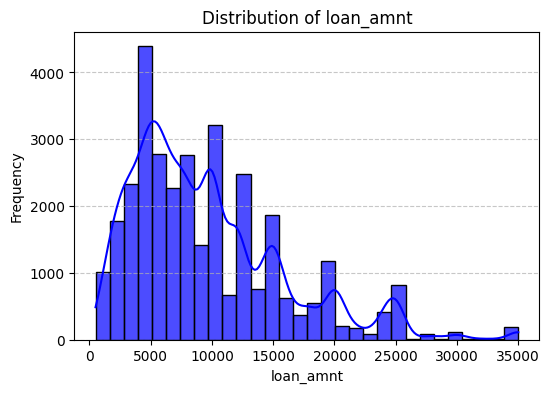

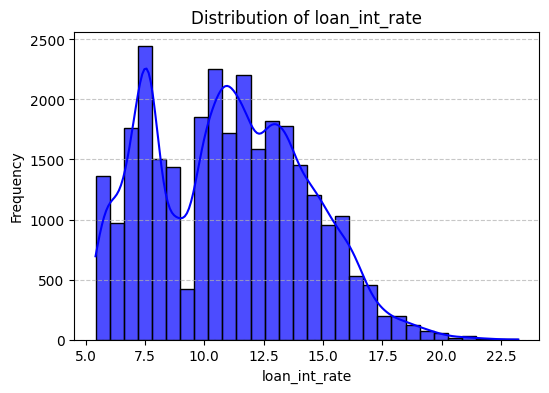

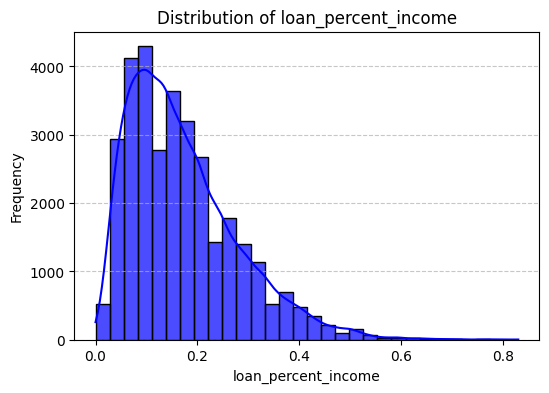

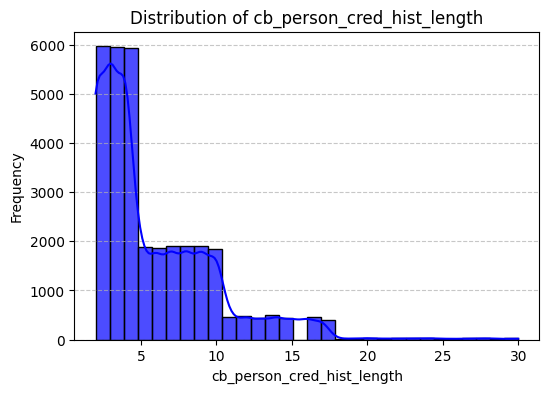

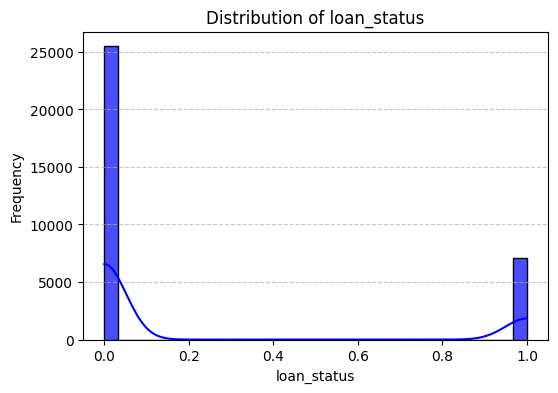

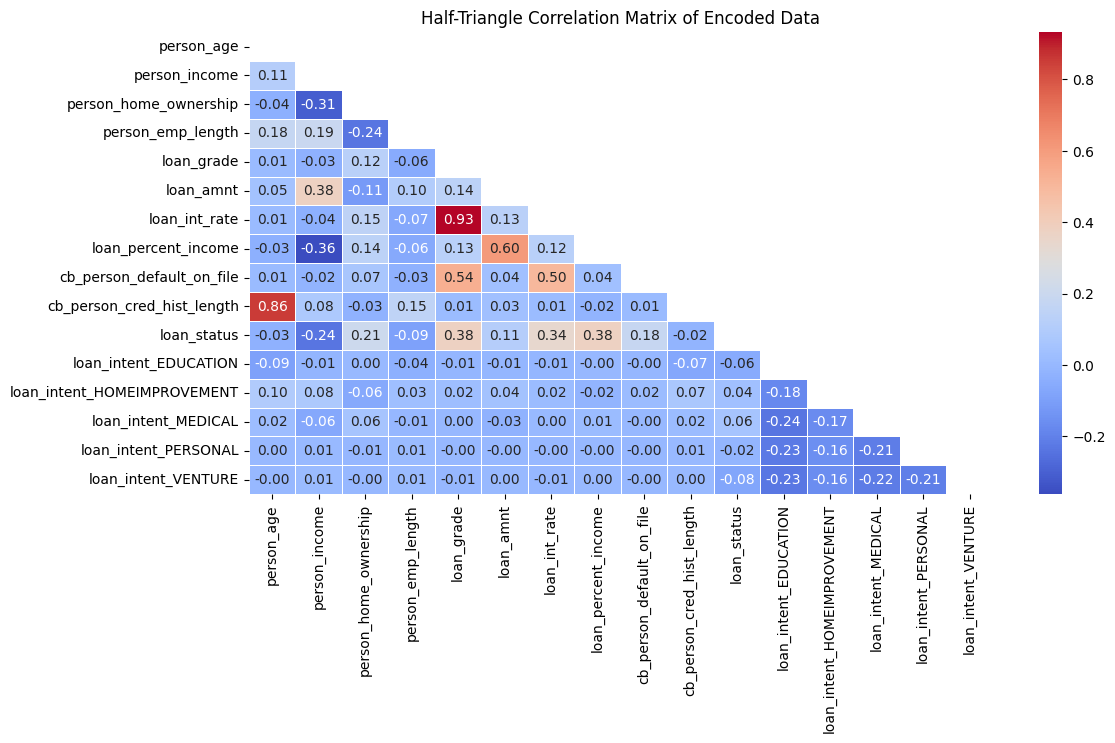

In [21]:
# Distribution of numerical features
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Correlation Matrix Heatmap using Seaborn

# Calculate the correlation matrix for numerical features
correlation_matrix = df_encoded.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask the upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Half-Triangle Correlation Matrix of Encoded Data')
plt.show()

In [22]:
# Step 4: Split data into training and testing sets (80% train, 20% test), with stratification on the target variable
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Label encoding the target

y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Display the resulting training and test set shapes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((22052, 15), (5514, 15), (22052,), (5514,))

In [23]:
# Import necessary libraries for model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

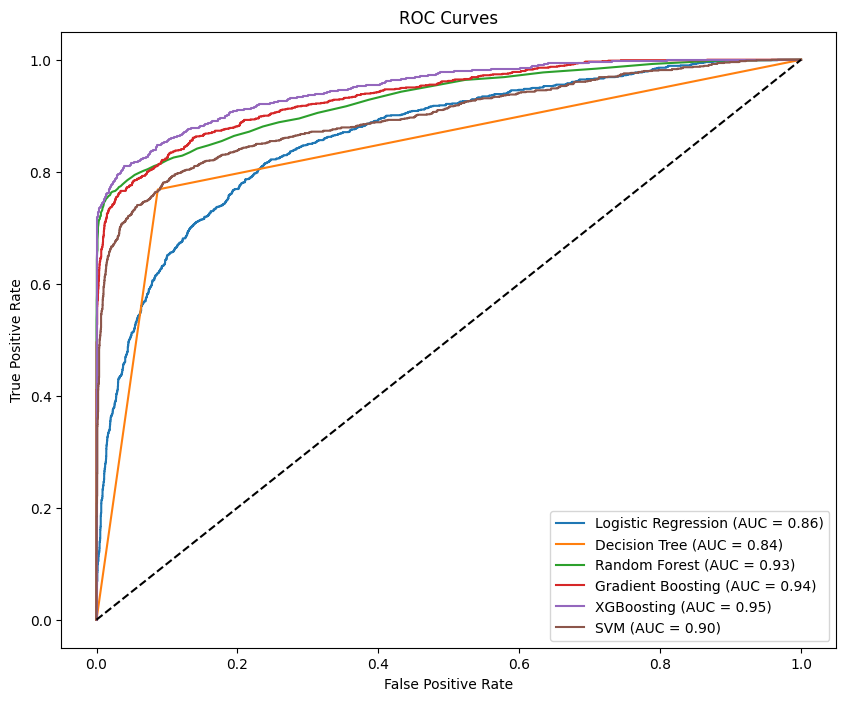

                     accuracy precision    recall  f1_score   roc_auc
Logistic Regression   0.85564  0.749054  0.498741   0.59879  0.862938
Decision Tree        0.881756  0.708753  0.768262  0.737309  0.840643
Random Forest        0.935981  0.957424  0.736356  0.832463  0.929968
Gradient Boosting    0.927457  0.937984  0.711167  0.808978  0.936557
XGBoosting           0.937069  0.942348  0.754828  0.838228  0.949598
SVM                  0.910954  0.909836  0.652393  0.759902  0.898217


In [24]:
# Define the models to be used
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoosting': XGBClassifier(),
    'SVM': SVC(probability=True)  # Set probability=True to get probability estimates for ROC AUC
}

# Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_proba': y_proba
    }

# Evaluate each model and store the results
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))
for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {result['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Display the evaluation metrics for all models
metrics_df = pd.DataFrame(results).T[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']]
print(metrics_df)

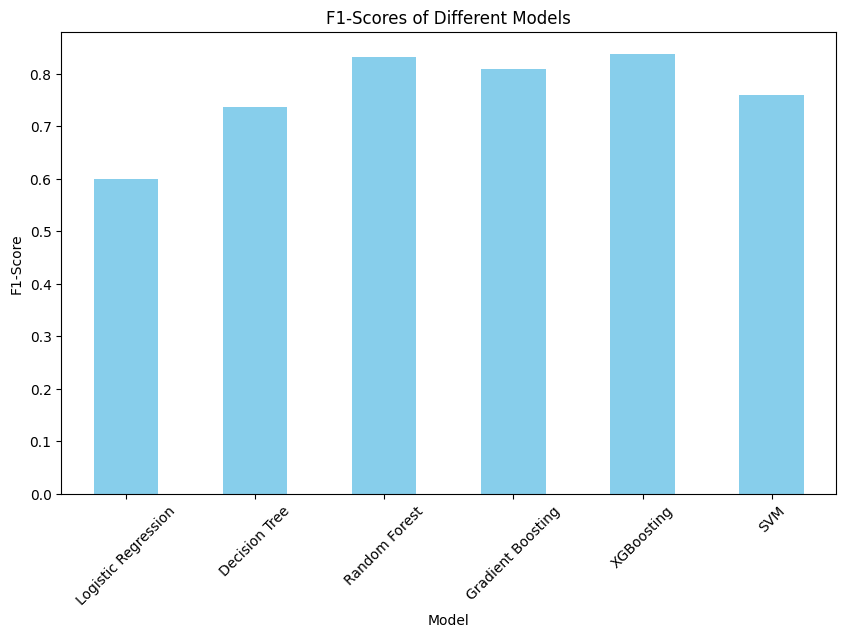

,accuracy,precision,recall,f1_score,roc_auc
Logistic Regression,0.85564,0.749054,0.498741,0.59879,0.862938
Decision Tree,0.881756,0.708753,0.768262,0.737309,0.840643
Random Forest,0.935981,0.957424,0.736356,0.832463,0.929968
Gradient Boosting,0.927457,0.937984,0.711167,0.808978,0.936557
XGBoosting,0.937069,0.942348,0.754828,0.838228,0.949598
SVM,0.910954,0.909836,0.652393,0.759902,0.898217


In [25]:
# Let's first create a comparison table with all metrics

# Create a DataFrame with evaluation metrics for all models
comparison_df = pd.DataFrame(results).T[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']]

# Plotting the comparison of F1-scores for each model using a bar chart
plt.figure(figsize=(10, 6))
comparison_df['f1_score'].plot(kind='bar', color='skyblue')
plt.title('F1-Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()

# Display the comparison table
comparison_df

In [26]:
# Hyperparameter tuning grids for RF and GB which outperformed other models
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Grid Search for Gradient Boosting
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_gb.fit(X_train, y_train)

# Retrieve the best estimators
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

# Evaluate the best models
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

def evaluate_model_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

# Random Forest performance
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc = evaluate_model_performance(y_test, y_pred_rf)

# Gradient Boosting performance
gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc_auc = evaluate_model_performance(y_test, y_pred_gb)


# Compare default and tuned Random Forest performance
performance_comparison_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Default Random Forest': [results['Random Forest']['accuracy'], results['Random Forest']['precision'], results['Random Forest']['recall'], results['Random Forest']['f1_score'], results['Random Forest']['roc_auc']],
    'Tuned Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc]
})

# Compare default and tuned Gradient Boosting performance
performance_comparison_gb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Default Gradient Boosting': [results['Gradient Boosting']['accuracy'], results['Gradient Boosting']['precision'], results['Gradient Boosting']['recall'], results['Gradient Boosting']['f1_score'], results['Gradient Boosting']['roc_auc']],
    'Tuned Gradient Boosting': [gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc_auc]
})

# Create a comparison DataFrame between tuned RF and GB
performance_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc],
    'Gradient Boosting': [gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc_auc]
})


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [27]:
# Hyperparameter tuning grids for RF, GB, XGBoost, Logistic Regression, SVM, and Decision Tree
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
svm_model = SVC(probability=True, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Grid Search for each model
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_gb.fit(X_train, y_train)

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train, y_train)

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train, y_train)

grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

# Retrieve the best estimators
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_
best_xgb = grid_search_xgb.best_estimator_
best_lr = grid_search_lr.best_estimator_
best_svm = grid_search_svm.best_estimator_
best_dt = grid_search_dt.best_estimator_



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [32]:
print("Best Hyperparameters and Scores for Each Model:")
print("-" * 50)
print("Random Forest")
print(f"Best Hyperparameters: {grid_search_rf.best_params_}")
print(f"Best F1 Score: {grid_search_rf.best_score_:.4f}")
print("-" * 50)

print("Gradient Boosting")
print(f"Best Hyperparameters: {grid_search_gb.best_params_}")
print(f"Best F1 Score: {grid_search_gb.best_score_:.4f}")
print("-" * 50)

print("XGBoost")
print(f"Best Hyperparameters: {grid_search_xgb.best_params_}")
print(f"Best F1 Score: {grid_search_xgb.best_score_:.4f}")
print("-" * 50)

print("Logistic Regression")
print(f"Best Hyperparameters: {grid_search_lr.best_params_}")
print(f"Best F1 Score: {grid_search_lr.best_score_:.4f}")
print("-" * 50)

print("Support Vector Machine")
print(f"Best Hyperparameters: {grid_search_svm.best_params_}")
print(f"Best F1 Score: {grid_search_svm.best_score_:.4f}")
print("-" * 50)

print("Decision Tree")
print(f"Best Hyperparameters: {grid_search_dt.best_params_}")
print(f"Best F1 Score: {grid_search_dt.best_score_:.4f}")
print("-" * 50)

Best Hyperparameters and Scores for Each Model:
--------------------------------------------------
Random Forest
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.8183
--------------------------------------------------
Gradient Boosting
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best F1 Score: 0.8312
--------------------------------------------------
XGBoost
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best F1 Score: 0.8276
--------------------------------------------------
Logistic Regression
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best F1 Score: 0.5765
--------------------------------------------------
Support Vector Machine
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score: 0.7698
--------------------------------------------------
Decision T

In [29]:
# Evaluate the best models
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_lr = best_lr.predict(X_test)
y_pred_svm = best_svm.predict(X_test)
y_pred_dt = best_dt.predict(X_test)

def evaluate_model_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

# Random Forest performance
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc = evaluate_model_performance(y_test, y_pred_rf)

# Gradient Boosting performance
gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc_auc = evaluate_model_performance(y_test, y_pred_gb)

# XGBoost performance
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_roc_auc = evaluate_model_performance(y_test, y_pred_xgb)

# Logistic Regression performance
lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc = evaluate_model_performance(y_test, y_pred_lr)

# SVM performance
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc = evaluate_model_performance(y_test, y_pred_svm)

# Decision Tree performance
dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc = evaluate_model_performance(y_test, y_pred_dt)

# Create a comparison DataFrame between all tuned models
performance_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc],
    'Gradient Boosting': [gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc_auc],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_roc_auc],
    'Logistic Regression': [lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc]
})

In [30]:
print("\nCompare performances of all 6 models:")
print(performance_comparison)


Compare performances of all 6 models:
      Metric  Random Forest  Gradient Boosting   XGBoost  Logistic Regression  \
0   Accuracy       0.936525           0.939427  0.936707             0.855459   
1  Precision       0.959563           0.949633  0.938542             0.748111   
2     Recall       0.737196           0.759866  0.756507             0.498741   
3   F1-Score       0.833808           0.844216  0.837750             0.598489   
4    ROC AUC       0.864318           0.874381  0.871430             0.726238   

        SVM  Decision Tree  
0  0.921291       0.934349  
1  0.922905       0.952017  
2  0.693535       0.732997  
3  0.791946       0.828273  
4  0.838787       0.861410  


In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

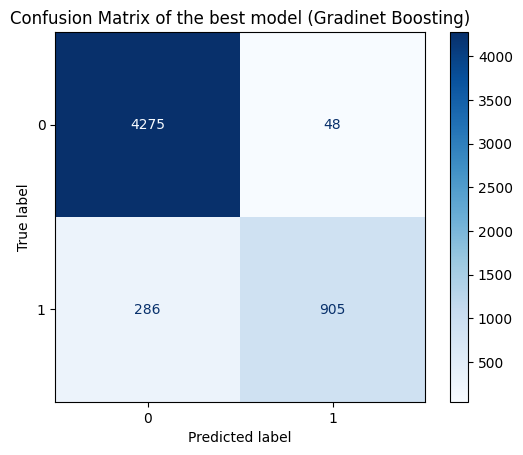

In [ ]:
plot_confusion_matrix(y_test, y_pred_gb, title="Confusion Matrix of the best model (Gradinet Boosting)")